<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Organisation nationale de lutte contre le
faux-monnayage (ONCFM)</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from joblib import dump
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import kstest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers</h3>
</div>

In [4]:
#Importation du fichier billets.csv
df_billets = pd.read_csv("billets.csv", sep=";")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1. - Analyse exploratoire du df_billets</h3>
</div>

In [7]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_billets.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_billets.shape[1]))

Le tableau comporte 1500 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [8]:
#La nature des données dans chacune des colonnes
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [9]:
#Affichage des 5 premières lignes de la table
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [10]:
#Statistiques descriptives
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [18]:
#Répartition des vrais et faux billets
print("\nRépartition des vrais/faux billets :")
print(df_billets['is_genuine'].value_counts())


Répartition des vrais/faux billets :
is_genuine
True     1000
False     500
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

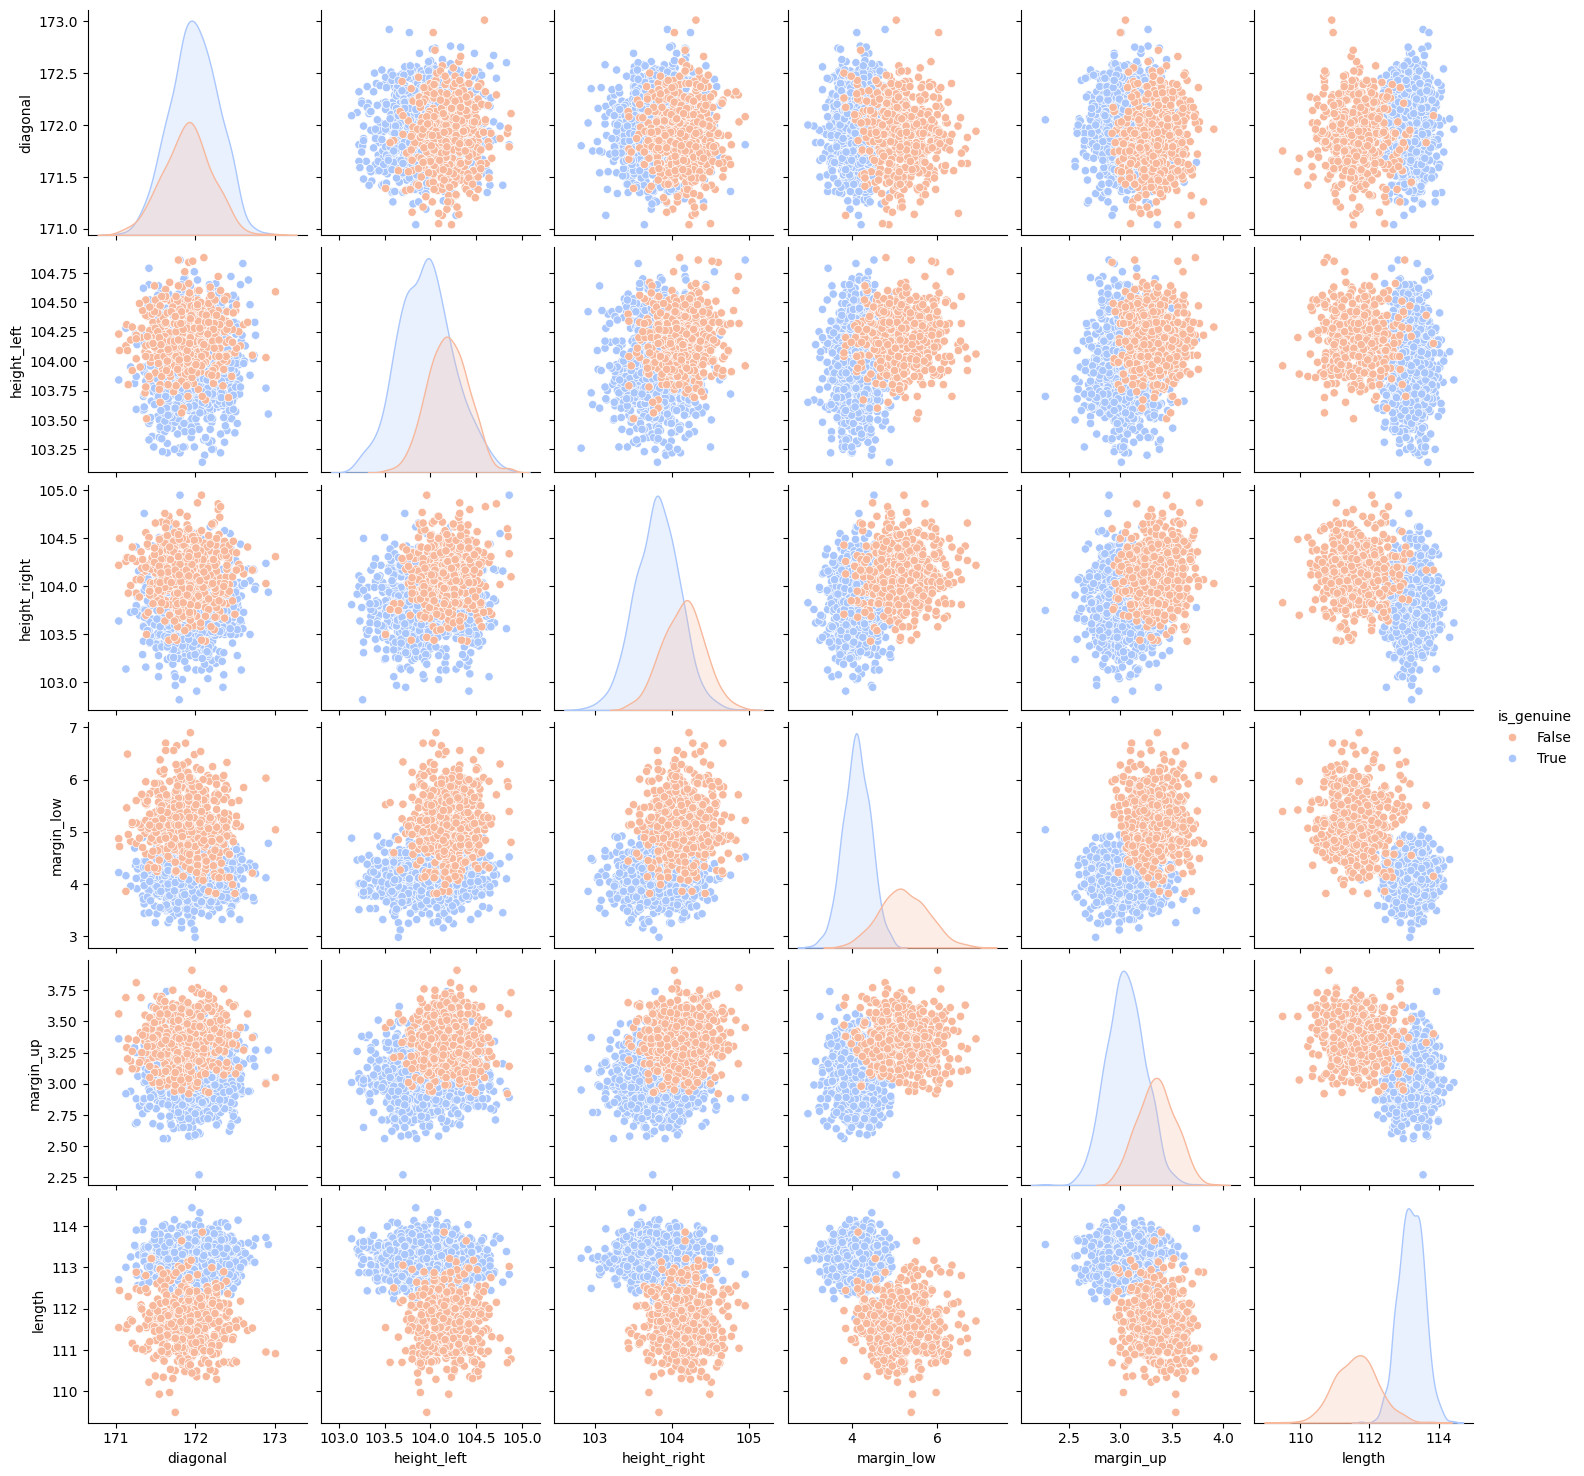

In [20]:
#Visualisation des distributions
plt.figure(figsize=(12, 8))
sns.pairplot(df_billets, hue="is_genuine", diag_kind="kde", palette="coolwarm_r")
plt.show()

In [22]:
#Vérification des valeurs nulles par colonne
valeurs_nulles = df_billets.isnull().sum()

#Affichage des colonnes avec leur nombre de valeurs nulles
print(valeurs_nulles)

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2. - Regression polynomiale pour les valeurs manqutes</h3>
</div>

Variance Inflation Factor (VIF):
       Variable            VIF
0         const  592495.682281
1      diagonal       1.018610
2   height_left       1.151474
3  height_right       1.260286
4    margin_low       1.913278
5     margin_up       1.419672
6        length       2.131067
Les VIF sont bien inférieurs à 5, cela suggère qu'il n y a pas de problème de colinéarité entre les variables.


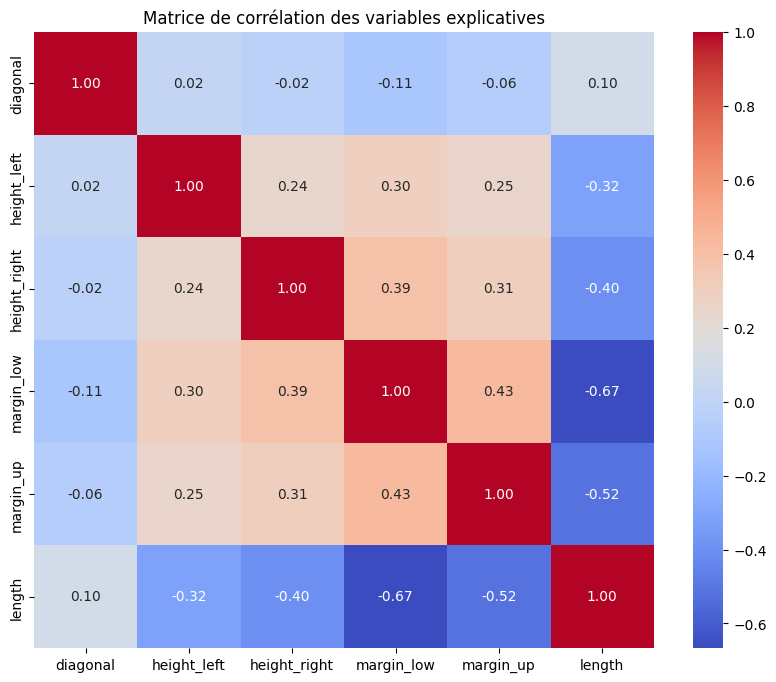

In [25]:
#Verification de la colinéarité des variables

#Séparation des variables explicatives
X = df_billets.drop(columns=['is_genuine'])

#Ajouter une constante pour calculer le VIF
X_const = add_constant(X)
X_const = X_const.dropna()

#Calculer le VIF pour chaque variable explicative
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)
print("Les VIF sont bien inférieurs à 5, cela suggère qu'il n y a pas de problème de colinéarité entre les variables.")

#Matrice de corrélation et visualisation
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables explicatives")
plt.show()

In [27]:
#Homoscédasticité

#Ajout d'une constante aux variables explicatives
X_sm = sm.add_constant(X)
X_sm = X_sm.dropna()

#Synchronisation de y avec les indices restants dans X_sm
y = df_billets.loc[X_sm.index, 'is_genuine'].astype(int)

#Ajustement du modèle OLS
model = sm.OLS(y, X_sm).fit()

#Récupéreration des résidus
residuals = model.resid

#Test de l'homoscédasticité avec Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_sm)

#Résultats du test Breusch-Pagan
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))
print("Résultats du test de Breusch-Pagan :")
for key, value in results.items():
    print(f"{key}: {value}")
print("Les résultats suggèrent qu'il y a une hétéroscédasticité.")

Résultats du test de Breusch-Pagan :
Lagrange multiplier statistic: 90.1118791375326
p-value: 2.87210334291334e-17
f-value: 15.927845106298488
f p-value: 8.370677762793827e-18
Les résultats suggèrent qu'il y a une hétéroscédasticité.


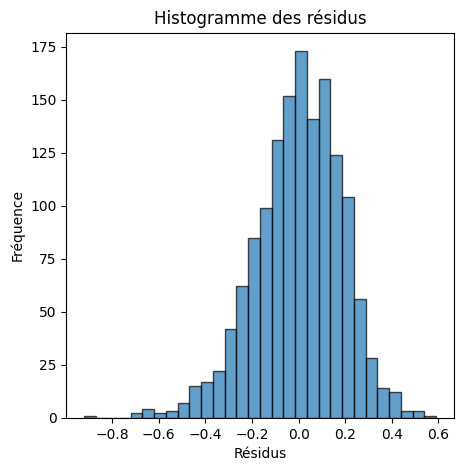

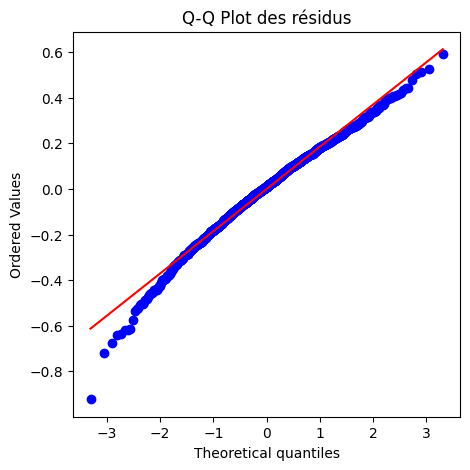

Test de Kolmogorov-Smirnov :
Statistique : 0.0348
p-value : 5.6251e-02
La p-value est supérieure à 0.05, cela suggère que les résidus suivent une distribution normale.


In [29]:
#Normalité des résidus

#Histogramme des résidus
plt.figure(figsize=(5, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

#Q-Q plot
plt.figure(figsize=(5, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des résidus')
plt.show()

#Test de Kolmogorov-Smirnov
ks_test = kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print("Test de Kolmogorov-Smirnov :")
print(f"Statistique : {ks_test.statistic:.4f}")
print(f"p-value : {ks_test.pvalue:.4e}")
print("La p-value est supérieure à 0.05, cela suggère que les résidus suivent une distribution normale.")

In [31]:
#Regression polynomiale

#Séparation des données avec et sans valeurs manquantes pour 'margin_low'
df_train = df_billets[df_billets['margin_low'].notnull()]
df_missing = df_billets[df_billets['margin_low'].isnull()]

#Sélection des colonnes prédictives
features = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']
X_train = df_train[features]
y_train = df_train['margin_low']

#Entraînement du modèle
model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=0.1))
model.fit(X_train, y_train)

#Prédiction des valeurs manquantes
X_missing = df_missing[features]
predicted_values = model.predict(X_missing)

#Remplissage des valeurs manquantes dans le DataFrame original
df_billets.loc[df_billets['margin_low'].isnull(), 'margin_low'] = predicted_values

#Vérification après remplissage
print("Valeurs manquantes après remplissage :")
print(df_billets.isnull().sum())

Valeurs manquantes après remplissage :
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [33]:
#Calcul du score R²
y_train_pred = model.predict(X_train)
r2 = (r2_score(y_train, y_train_pred).round(2))
print("Coefficient de détermination (R²) :", r2)

Coefficient de détermination (R²) : 0.68


In [35]:
#Division en données d'entraînement et de test
X = df_billets[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]
y = df_billets['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Test des modeles</h2>
</div>

In [38]:
#Importation du df_billets2 pour predire la valeur is_genuine
df_billets2 = pd.read_csv("billets_production.csv")

In [40]:
#Sélection des colonnes utiles
X_new = df_billets2[['diagonal', 'height_left', 'height_right', 'margin_up', 'margin_low', 'length']]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1. - Regression logistique</h3>
</div>

In [43]:
#Regression logistique
log_reg_model = LogisticRegression(random_state=8)
log_reg = log_reg_model.fit(X_train, y_train)

#Prediction des étiquettes True/False
y_pred_log = log_reg.predict(X_test)
#Prédiction des probabilités
y_pred_proba_log = log_reg.predict_proba(X_test)

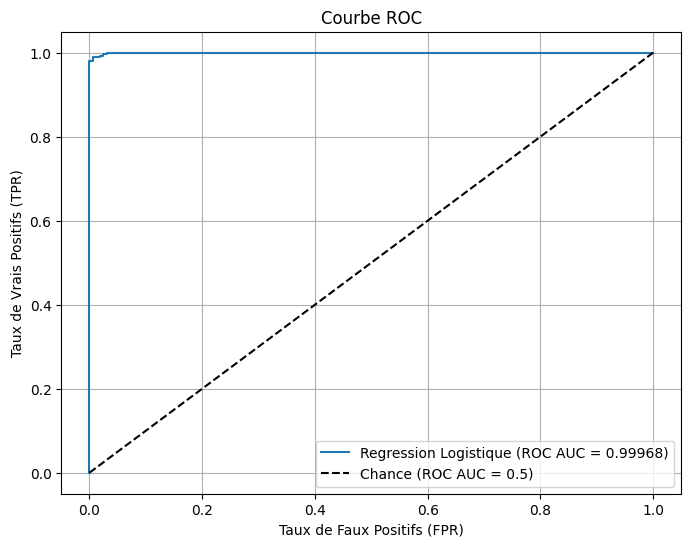

In [45]:
#Score ROC AUC
#Prédiction des probabilités pour la classe positive
y_pred_proba_log_pos = y_pred_proba_log[:, 1]

#Calcul du score ROC AUC
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log_pos)

#Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_pos)

#Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Regression Logistique (ROC AUC = {roc_auc_log:.5f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance (ROC AUC = 0.5)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

In [47]:
#Prédictions pour le df_billets2 des etiquettes et des probabilités
y_new_pred_log = log_reg.predict(X_new)
y_new_proba_log = log_reg.predict_proba(X_new)

In [49]:
#Ajout des prédictions et probabilités au dataset
df_billets2['is_genuine_pred_log'] = y_new_pred_log
df_billets2['proba_true_log'] = y_new_proba_log[:, 1]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2. - K-means</h3>
</div>

In [52]:
#K-means
kmeans_model = KMeans(n_clusters=2, random_state=808)
kmeans = kmeans_model.fit(X_train)

#Prediction des étiquettes True/False
y_pred_kmeans = kmeans.predict(X_test)

#Réajustement des labels : 1 devient False, 0 devient True
y_pred_kmeans = [False if label == 1 else True for label in y_pred_kmeans]

In [53]:
#Score silhouette
silhouette = round(silhouette_score(X_test, y_pred_kmeans), 5)
print(f"\nSilhouette Score: {silhouette}")


Silhouette Score: 0.50997


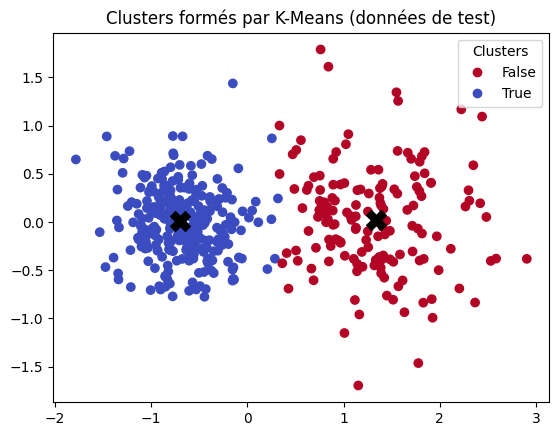

In [56]:
#Réduction de la dimension pour la visualisation
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)

#Récupération des centroids dans la même dimension
centroids_reduced = pca.transform(kmeans.cluster_centers_)

#Visualisation les clusters et centroides
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_kmeans, cmap='coolwarm_r')
plt.title("Clusters formés par K-Means (données de test)")
plt.legend(handles=scatter.legend_elements()[0], labels=['False', 'True'], title="Clusters")
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.show()

In [58]:
#Prédictions pour le df_billets2 des etiquettes
y_new_pred_kmeans = kmeans.predict(X_new)
y_new_pred_kmeans = [False if label == 1 else True for label in y_new_pred_kmeans]

In [60]:
#Ajout des predictions au dataset
df_billets2['is_genuine_pred_kmeans'] = y_new_pred_kmeans

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3. - KNN</h3>
</div>

In [63]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=11)
knn = knn_model.fit(X_train, y_train)

#Prediction des étiquettes True/False
y_pred_knn = knn.predict(X_test)
#Prédiction des probabilités
y_pred_proba_knn = knn.predict_proba(X_test)

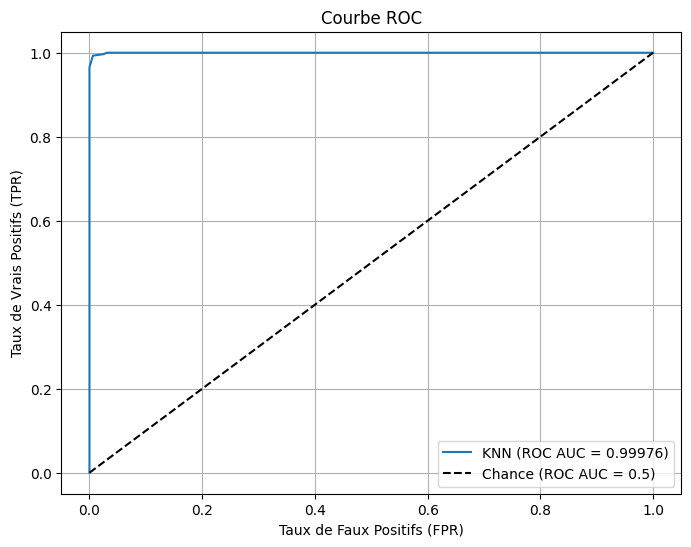

In [65]:
#Score ROC AUC
#Prédiction des probabilités pour la classe positive
y_pred_proba_knn_pos = y_pred_proba_knn[:, 1]

#Calcul du score ROC AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn_pos)

#Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn_pos)

#Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (ROC AUC = {roc_auc_knn:.5f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance (ROC AUC = 0.5)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

In [67]:
#Prédictions pour le df_billets2 des etiquettes et des probabilités
y_new_pred_knn = knn.predict(X_new)
y_new_proba_knn = knn.predict_proba(X_new)

In [69]:
#Ajout des prédictions et probabilités au dataset
df_billets2['is_genuine_pred_knn'] = y_new_pred_knn
df_billets2['proba_true_knn'] = y_new_proba_knn[:, 1]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4. - Random Forest</h3>
</div>

In [72]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=101, random_state=808)
rf = rf_model.fit(X_train, y_train)

#Prediction des étiquettes True/False
y_pred_rf = rf.predict(X_test)
#Prédiction des probabilités
y_pred_proba_rf = rf.predict_proba(X_test)

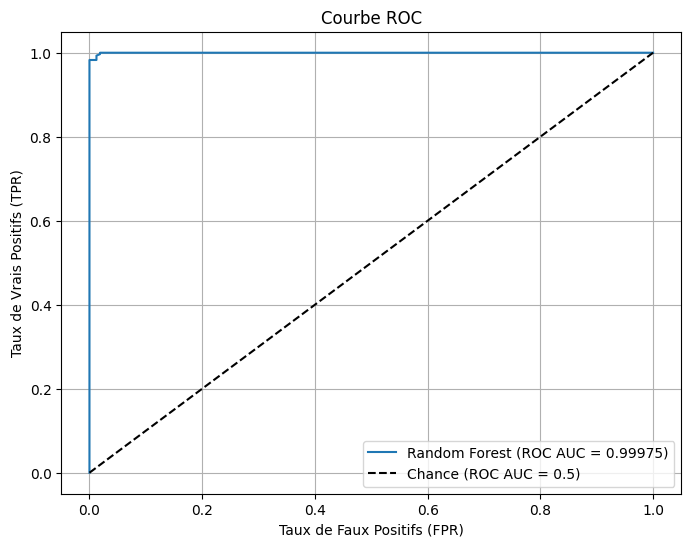

In [74]:
#Score ROC AUC
#Prédiction des probabilités pour la classe positive
y_pred_proba_rf_pos = y_pred_proba_rf[:, 1]

#Calcul du score ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf_pos)

#Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_pos)

#Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (ROC AUC = {roc_auc_rf:.5f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance (ROC AUC = 0.5)")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

In [76]:
#Prédictions pour le df_billets2 des etiquettes et des probabilités
y_new_pred_rf = rf.predict(X_new)
y_new_proba_rf = rf.predict_proba(X_new)

In [78]:
#Ajout des prédictions et probabilités au dataset
df_billets2['is_genuine_pred_rf'] = y_new_pred_rf
df_billets2['proba_true_rf'] = y_new_proba_rf[:, 1]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5. - Analyse des tests</h3>
</div>

In [81]:
#Affichage du df_billets2
df_billets2

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine_pred_log,proba_true_log,is_genuine_pred_kmeans,is_genuine_pred_knn,proba_true_knn,is_genuine_pred_rf,proba_true_rf
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.006864,False,False,0.0,False,0.019802
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.001406,False,False,0.0,False,0.000000
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.001737,False,False,0.0,False,0.000000
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.912309,True,True,1.0,True,0.970297
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.999557,True,True,1.0,True,0.990099


In [83]:
print("Les quatres modèles ont des prédictions similaires sur les billets de ce dataset.")

Les quatres modèles ont des prédictions similaires sur les billets de ce dataset.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5.1. - Matrice de confusion et rapport de classification</h3>
</div>

In [86]:
#Regression logistique
print("Régression Logistique :")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

#K-means
print("\nk-Means :")
print(confusion_matrix(y_test, y_pred_kmeans))
print(classification_report(y_test, y_pred_kmeans))

#KNN
print("\nKNN :")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

#Random Forest
print("\nRandom Forest :")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("En analysant ces données, le modèle K-Means semble moins performant.")

Régression Logistique :
[[156   5]
 [  1 288]]
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       161
        True       0.98      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450


k-Means :
[[153   8]
 [  0 289]]
              precision    recall  f1-score   support

       False       1.00      0.95      0.97       161
        True       0.97      1.00      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


KNN :
[[157   4]
 [  1 288]]
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       161
        True       0.99      1.00      0.99       289

    accuracy                           0.99       450
   macro avg     

In [88]:
#Définir les métriques pour la validation croisée
scorers = {
    "Accuracy": "accuracy",
    "F1-Score": make_scorer(f1_score, average="weighted"),
    "ROC AUC": make_scorer(roc_auc_score, needs_proba=True)}

#Création d'une validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Collecte des résultats
log_reg_results = {
    metric_name: cross_val_score(log_reg_model, X, y, cv=cv, scoring=scorer, n_jobs=-1)
    for metric_name, scorer in scorers.items()}
knn_results = {
    metric_name: cross_val_score(knn_model, X, y, cv=cv, scoring=scorer, n_jobs=-1)
    for metric_name, scorer in scorers.items()}
rf_results = {
    metric_name: cross_val_score(rf_model, X, y, cv=cv, scoring=scorer, n_jobs=-1)
    for metric_name, scorer in scorers.items()}

#Affichage des résumé des modeles
print("\nRésumé des métriques Regression Logistique:")
for metric, scores in log_reg_results.items():
    print(f"{metric}: {scores.mean():.5f} ± {scores.std():.4f}")
print("\nRésumé des métriques KNN:")
for metric, scores in knn_results.items():
    print(f"{metric}: {scores.mean():.5f} ± {scores.std():.4f}")
print("\nRésumé des métriques Random Forest:")
for metric, scores in rf_results.items():
    print(f"{metric}: {scores.mean():.5f} ± {scores.std():.4f}")
    
print("En analysant les scores de ces trois modèles, le modèle Random Forest parait être le plus performant.")


Résumé des métriques Regression Logistique:
Accuracy: 0.99067 ± 0.0044
F1-Score: 0.99065 ± 0.0044
ROC AUC: 0.99860 ± 0.0017

Résumé des métriques KNN:
Accuracy: 0.99133 ± 0.0045
F1-Score: 0.99131 ± 0.0045
ROC AUC: 0.99503 ± 0.0027

Résumé des métriques Random Forest:
Accuracy: 0.99133 ± 0.0062
F1-Score: 0.99131 ± 0.0062
ROC AUC: 0.99948 ± 0.0003
En analysant les scores de ces trois modèles, le modèle Random Forest parait être le plus performant.


In [89]:
#Exportation du modèle Random Forest
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']